In [43]:
import qiskit
from qiskit import Aer, execute
import os
token = os.environ.get('ionq_token')
from qiskit_ionq_provider import IonQProvider 
from qiskit.quantum_info import entropy, DensityMatrix
from qiskit.visualization import plot_state_city

In [20]:
provider = IonQProvider(token=token)

In [33]:
from qiskit import QuantumCircuit

# Create a bell state circuit.
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

# Show the circuit:
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

In [34]:
backend_sim = Aer.get_backend('statevector_simulator')
sim = execute(qc, backend_sim, shots=1000)
sim_result = sim.result()

In [38]:
state_vec = sim_result.get_statevector()
entropy(state_vec)

0

In [45]:
DensityMatrix(state_vec)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))

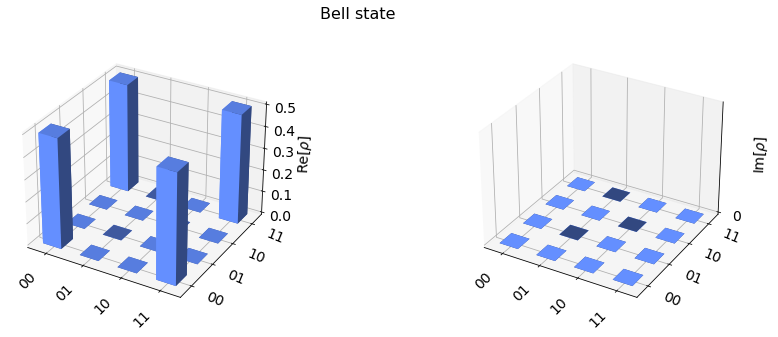

In [42]:
plot_state_city(state_vec, title='Bell state')